<a href="https://colab.research.google.com/github/mldurga/projects/blob/master/wagon_shipment_reader2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wagon shipment number scanner

## Its skeleton version, further improvement is in pipeline


<<== First upload the images you want to work with, in the folder shown. Then execute the first cell by pressing **shift+enter** or click Runall in Runtime from menu options and press predict button appears in few seconds. You will get **wagon_excel** sheet in the same folder and HTML output with the images.


In [1]:
!pip install easyocr Pillow opencv-python-headless==4.1.2.30 -qq
!pip install fastai -Uqq

     |████████████████████████████████| 63.6 MB 49 kB/s 
     |████████████████████████████████| 21.8 MB 65.7 MB/s 
     |████████████████████████████████| 189 kB 30.0 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 


In [ ]:
# !wget https://user-images.githubusercontent.com/19243618/147801374-0915efba-943d-4811-866e-b00fd0a961e4.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801504-66b17664-ef45-48e1-9f20-fc077d66676a.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801523-1d33a350-167d-406a-a8aa-4d67d28e3f9b.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801534-17340205-5600-4e76-9cb1-1b47c0f140b2.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801565-c3731a50-9eda-430b-97ce-bfb2433e9b5d.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801590-dce11c1a-d8bd-47f9-aa43-28f8ce471d4e.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801613-1e7b6cbb-24b1-4074-a6a0-c332e40b7b6c.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801637-921474aa-ce39-4144-afca-e8910c5d1438.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801681-1eaf53dc-f6b4-4a46-9048-633681a5c0ed.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801703-452cc054-98c2-40e4-9585-5b356c5ccb5f.jpeg 

In [4]:
import re
import easyocr as ocr
import numpy as np
from PIL import Image
import pandas as pd
from fastai.vision.all import *


import base64
from io import BytesIO
from IPython.display import HTML

def load_model(): 
    reader = ocr.Reader(['en'],model_storage_directory='.')
    return reader 

#region names and wagon types
region_names={'CR', 'KR', 'NR', 'NCR', 'NER', 'NFR', 'NWR', 'ER', 'ECR', 'ECOR',
       'SR', 'SCR', 'SCOR', 'SER', 'SECR', 'SWR', 'WR', 'WCR'}
wagon={'steel_wagon':['BFNS','BOST','BOSTHS','BOXN','BRN','BRNA','BRNAHS'],'brake_van':['BVCM','BVZC','BVZI']}


#wagon number extraction
def wagon_num(num):
  x=[]
  for i in range(len(num)):
    if len(num[i])!=11:
      o=i
      while o<(len(num)-1):
        if len(num[i]+num[o+1])==11:
          x.append(num[i]+num[o+1])
        o+=1
    else:x.append(num[i])
  return x 

#images files extraction from folder
fn=get_image_files('/content/')

#wagon number 
def wagon_out(x, wagon_number, allnums):
  all_nums=wagon_num(x)
  if len(all_nums)>0: wagon_number.append(all_nums[0])
  else: wagon_number.append("")
  allnums.append([all_nums])

#wagon type extraction

def wagon_type(txts, wagontype):
  wagon_txts=[x for x in txts if x in (wagon['steel_wagon'] or wagon['brake_van'])]
  if len(wagon_txts)>0: wagontype.append([wagon_txts])
  else: wagontype.append("")

#following functionality is for html display of images in dataframe
def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((300, 200), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

pd.set_option('display.max_colwidth', -1)

#end of functionality



#predict function
def predict():
  wagon_number=[];zone=[];wagon_id=[];allnums=[];wagontype=[];image=[]
  reader=load_model()
  for i in fn:
    result=reader.readtext(np.array(Image.open(i)))
    results=[x[1] for x in result]
    outs=[re.sub('\W+','',x).upper() for x in results]
    nums=[e for e in [re.sub("\D+",'',o) for o in outs] if len(e)>0]
    txts=[e for e in [re.sub("\d+",'',o) for o in outs] if len(e)>0]
    zones=[x for x in txts if x in region_names]
    wagon_out(nums,wagon_number, allnums)


    if len(zones)>0: zone.append(zones[0])
    else: zone.append("")

    wagon_type(txts,wagontype)

    wagon_id.append(f'{zone[-1]}{wagon_number[-1]}')

    image.append(str(i))

  df=pd.DataFrame({'wagon_number': wagon_number,'zone':zone, 'wagon_id':wagon_id, 'wagon_type':wagontype,'image':image} )
  # df.to_excel(r'./wagon_nums.xlsx',index=False)
  display(HTML(df.to_html(formatters={'image': image_formatter}, escape=False)))
  return HTML(df.to_html(formatters={'image': image_formatter}, escape=False))




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,wagon_number,zone,wagon_id,wagon_type,image
0,21140927361,SECR,SECR21140927361,,
1,,ER,ER,,
2,21141129511,,21141129511,,
3,,,,,
4,19140338775,,19140338775,,
5,21101015939,ECR,ECR21101015939,"[[BOSTHS, BOSTHS]]",
6,,ECR,ECR,,
7,,,,[[BOSTHS]],
8,,,,,
9,,WR,WR,,

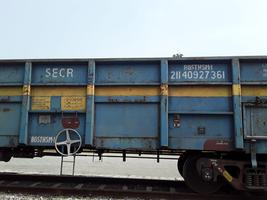
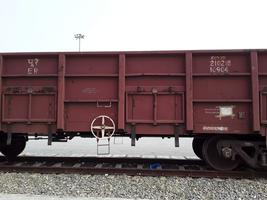
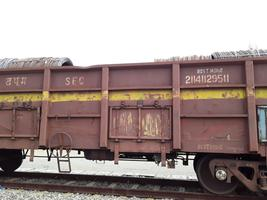
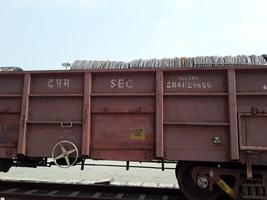
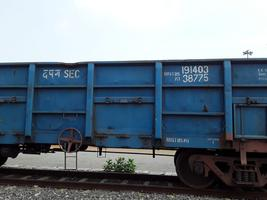
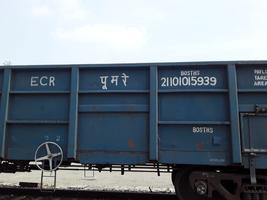
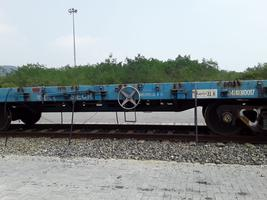
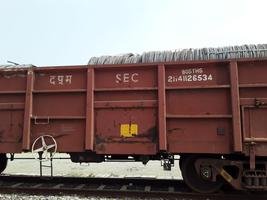
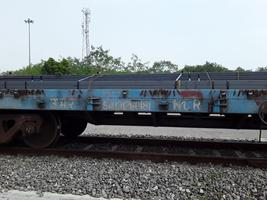
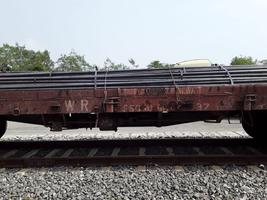
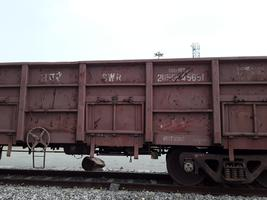
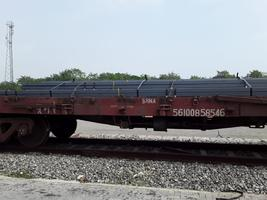
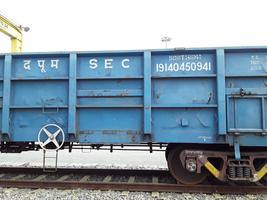
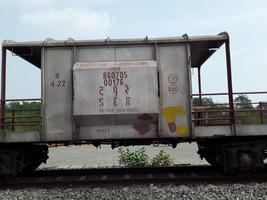

,wagon_number,zone,wagon_id,wagon_type,image
0,21140927361,SECR,SECR21140927361,,
1,,ER,ER,,
2,21141129511,,21141129511,,
3,,,,,
4,19140338775,,19140338775,,
5,21101015939,ECR,ECR21101015939,"[[BOSTHS, BOSTHS]]",
6,,ECR,ECR,,
7,,,,[[BOSTHS]],
8,,,,,
9,,WR,WR,,

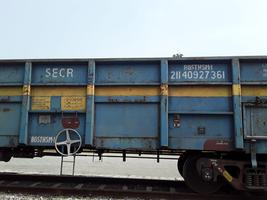
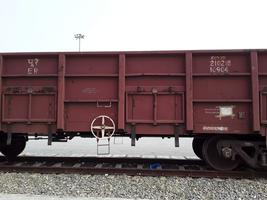
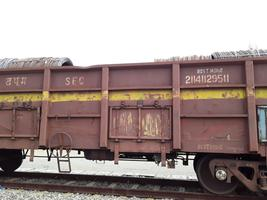
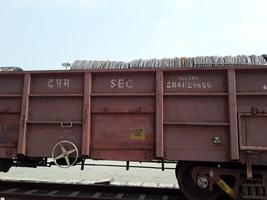
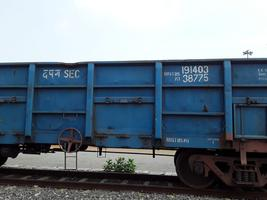
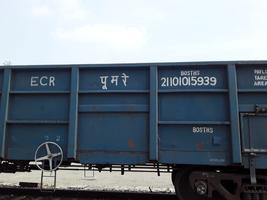
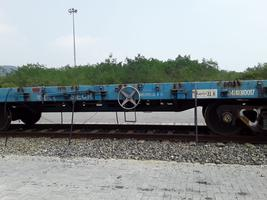
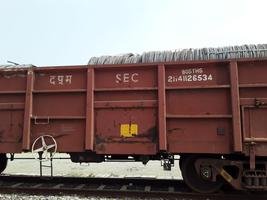
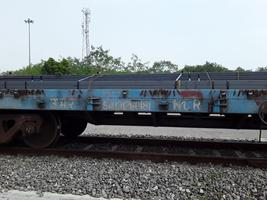
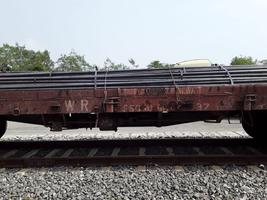
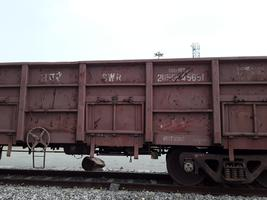
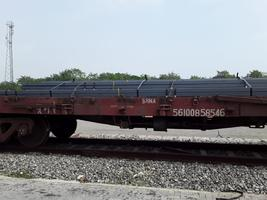
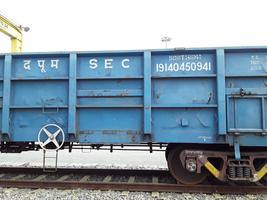
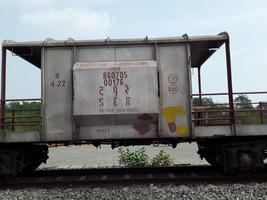

In [5]:
predict()

In [ ]:
def predict():
   wagon_number=[];region=[];texts=[];nums=[];image=[]
   for i in fn:
     ocr = PaddleOCR(use_angle_cls=True, lang='en',use_gpu=False)
     result = ocr.ocr(str(i), cls=True)
     outs = [line[1][0] for line in result]
     txts=[item.upper() for sublist in [re.findall("[a-zA-Z]+",o) for o in outs] for item in sublist]
     num=[item for sublist in [re.findall(r'\d+',o) for o in outs] for item in sublist]
     r_region=rail_region(txts)
     wagon=wagon_num(num)
     wagon_number.append({wagon[0] if len(wagon)>0 else None});region.append(r_region);texts.append(txts);nums.append(num);image.append(str(i))
   df=pd.DataFrame({'wagon_number':wagon_number, 'region':region, 'texts':texts,'nums':nums,'image':image })
   df.to_excel(r'/content/wagon_excel.xlsx', index=False)
   display(HTML(df.to_html(formatters={'image': image_formatter}, escape=False)))
   return HTML(df.to_html(formatters={'image': image_formatter}, escape=False))

In [ ]:
region_names={'CR', 'KR', 'NR', 'NCR', 'NER', 'NFR', 'NWR', 'ER', 'ECR', 'ECOR',
       'SR', 'SCR', 'SCOR', 'SER', 'SECR', 'SWR', 'WR', 'WCR'}
wagon={'steel_wagon':['BFNS','BOST','BOSTHS','BOXN','BRN','BRNA','BRNAHS'],'brake_van':['BVCM','BVZC','BVZI']}

def wagon_num(num):
  x=[]
  for i in range(len(num)):
    if len(num[i])!=11:
      o=i
      while o<(len(num)-1):
        if len(num[i]+num[o+1])==11:
          x.append(num[i]+num[o+1])
        o+=1
    else:x.append(num[i])
  return x 

def rail_region(txts):
  region_name=[]
  if len(txts)>0:
    for x in txts:
      if x in region_names:
        region_name.append(x)
    return region_name

Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.4/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.4/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext'

,wagon_number,region,texts,nums,image
0,{94011810314},[],[T],"[8, 5, 94011810314]",
1,{21120957227},[],"[OR, C, M]","[0748, 1, 21120957227]",
2,{21151167756},None,[],"[478757, 21151167756, 2212]",
3,{None},[],"[BOSTHSM, MBS, CARRYING, TARE, ARE, FITTEDWITHTWINPIPE, GRADUATED, RELEASEAIR]","[2, 210618, 0582]",
4,{None},[SWR],"[SWR, BUSIHSMII]","[2115064516, 78]",
5,{86100861147},[],"[BVZI, BL, EC, R, CBO, WITH, TWIN, PIPE, R, CT, NOTTOBE, LOOSE, SHUNTE]","[3930, 86100861147, 10, 23, 24, 230]",
6,{None},[],"[BOSTISM, U, Y, A]","[30198, 2, 3]",
7,{94031710649},[],[BRN],"[229, 94031710649]",
8,{94121710580},[],[BRN],"[229, 94121710580]",
9,{80669501161},[],"[EOSM, M]","[8, 0669501161]",

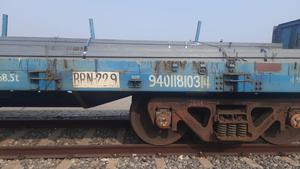
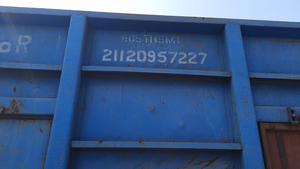
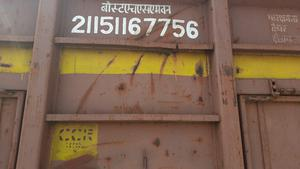
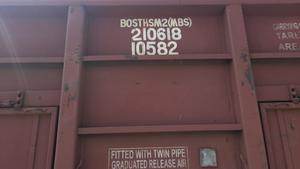
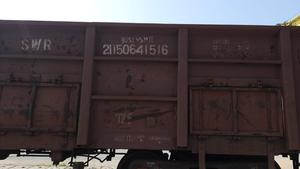
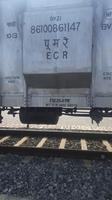
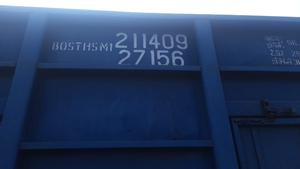
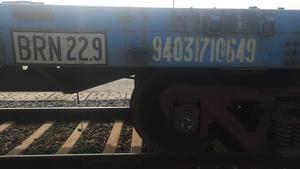
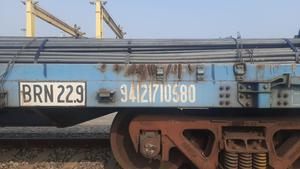
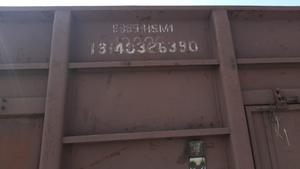

In [ ]:
!pip easyocr opencv-python-headless Pillow -Uqq

from fastai.vision.all import *

from PIL import Image
import re
import base64
import pandas as pd
from io import BytesIO
from IPython.display import HTML



import IPython
import uuid
from google.colab import output

class InvokeButton(object):
  def __init__(self, title, callback):
    self._title = title
    self._callback = callback

  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)

    template = """<button id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id)
    return html




path="/content/"
fn=get_image_files('/content/')
region_names={'CR', 'KR', 'NR', 'NCR', 'NER', 'NFR', 'NWR', 'ER', 'ECR', 'ECOR',
       'SR', 'SCR', 'SCOR', 'SER', 'SECR', 'SWR', 'WR', 'WCR'}
wagon={'steel_wagon':['BFNS','BOST','BOSTHS','BOXN','BRN','BRNA','BRNAHS'],'brake_van':['BVCM','BVZC','BVZI']}

def wagon_num(num):
  x=[]
  for i in range(len(num)):
    if len(num[i])!=11:
      o=i
      while o<(len(num)-1):
        if len(num[i]+num[o+1])==11:
          x.append(num[i]+num[o+1])
        o+=1
    else:x.append(num[i])
  return x 

def rail_region(txts):
  region_name=[]
  if len(txts)>0:
    for x in txts:
      if x in region_names:
        region_name.append(x)
    return region_name

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((300, 200), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

pd.set_option('display.max_colwidth', -1)


def predict():
   wagon_number=[];region=[];texts=[];nums=[];image=[]
   for i in fn:
     ocr = PaddleOCR(use_angle_cls=True, lang='en',use_gpu=False)
     result = ocr.ocr(str(i), cls=True)
     outs = [line[1][0] for line in result]
     txts=[item.upper() for sublist in [re.findall("[a-zA-Z]+",o) for o in outs] for item in sublist]
     num=[item for sublist in [re.findall(r'\d+',o) for o in outs] for item in sublist]
     r_region=rail_region(txts)
     wagon=wagon_num(num)
     wagon_number.append({wagon[0] if len(wagon)>0 else None});region.append(r_region);texts.append(txts);nums.append(num);image.append(str(i))
   df=pd.DataFrame({'wagon_number':wagon_number, 'region':region, 'texts':texts,'nums':nums,'image':image })
   df.to_excel(r'/content/wagon_excel.xlsx', index=False)
   display(HTML(df.to_html(formatters={'image': image_formatter}, escape=False)))
   return HTML(df.to_html(formatters={'image': image_formatter}, escape=False))

InvokeButton('Predict', predict)

In [ ]:
#Download test images if you want to test the application by unhashing and executing following 
!wget https://user-images.githubusercontent.com/19243618/147801374-0915efba-943d-4811-866e-b00fd0a961e4.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801504-66b17664-ef45-48e1-9f20-fc077d66676a.jpeg 
!wget https://user-images.githubusercontent.com/19243618/147801523-1d33a350-167d-406a-a8aa-4d67d28e3f9b.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801534-17340205-5600-4e76-9cb1-1b47c0f140b2.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801565-c3731a50-9eda-430b-97ce-bfb2433e9b5d.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801590-dce11c1a-d8bd-47f9-aa43-28f8ce471d4e.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801613-1e7b6cbb-24b1-4074-a6a0-c332e40b7b6c.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801637-921474aa-ce39-4144-afca-e8910c5d1438.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801681-1eaf53dc-f6b4-4a46-9048-633681a5c0ed.jpeg 
# !wget https://user-images.githubusercontent.com/19243618/147801703-452cc054-98c2-40e4-9585-5b356c5ccb5f.jpeg 

--2022-01-18 21:22:53--  https://user-images.githubusercontent.com/19243618/147801374-0915efba-943d-4811-866e-b00fd0a961e4.jpeg
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61331 (60K) [image/jpeg]
Saving to: ‘147801374-0915efba-943d-4811-866e-b00fd0a961e4.jpeg’

147801374-0915efba- 100%[===================>]  59.89K  --.-KB/s    in 0.009s  

2022-01-18 21:22:53 (6.81 MB/s) - ‘147801374-0915efba-943d-4811-866e-b00fd0a961e4.jpeg’ saved [61331/61331]

--2022-01-18 21:22:53--  https://user-images.githubusercontent.com/19243618/147801504-66b17664-ef45-48e1-9f20-fc077d66676a.jpeg
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to